# Evaluation of OCR

## Set Up

### Imports

In [2]:
from metric import cer, wer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import jiwer
import os

### Prepare Gound Truth and Output Data

In [3]:
gt_dict = dict()
results_dict = dict()

for folder in os.listdir("Ground Truth"):
    with open(f"Ground Truth/{folder}/{folder}.csv", "r", encoding="UTF-8", newline="") as file:
        reader = csv.reader(file, delimiter="\t")
        next(reader)
        gt = dict(reader)
    gt_dict[folder] = gt

for folder in os.listdir("result"):
    with open(f"result/{folder}/result_{folder}.csv", "r", encoding="UTF-8", newline="") as file:
        reader = csv.reader(file, delimiter="\t")
        next(reader)
        res = dict(reader)
    results_dict[folder] = res

## Evaluation

In [4]:
df_dict = dict()

for folder in os.listdir("result"):
    os.makedirs(f"evaluation/{folder}", exist_ok=True)
    metric_list = []

    for row in results_dict[folder].keys():
        ref = gt_dict[folder.replace("raw_", "")][row]
        hyp = results_dict[folder][row]
        word_output = jiwer.process_words(ref, hyp)
        with open(f"evaluation/{folder}/{row}.txt", "w", encoding="UTF-8") as file:
            result = f"""=============RESULT=============

{jiwer.visualize_alignment(word_output, show_measures=False)}Substitutions: {word_output.substitutions}
Insertions   : {word_output.insertions}
Deletions    : {word_output.deletions}
Hits         : {word_output.hits}"""

            print(result, file=file)
        
        metric_list.append((row, cer(ref, hyp), wer(ref, hyp)))
    
    df_dict[folder] = pd.DataFrame(metric_list, columns=["timestamp", "CER", "WER"]).set_index("timestamp")

In [36]:
basdat_4 = df_dict["basdat_4"].merge(df_dict["raw_basdat_4"], on="timestamp", suffixes=["_mod", "_raw"])
basdat_4 = basdat_4[["CER_mod", "CER_raw", "WER_mod", "WER_raw"]]
display(basdat_4)
display(basdat_4.describe())

print("CER")
print("mod menang", (basdat_4["CER_mod"] - basdat_4["CER_raw"] < 0).sum())
print("raw menang", (basdat_4["CER_mod"] - basdat_4["CER_raw"] > 0).sum())
print("")
print("WER")
print("mod menang", (basdat_4["WER_mod"] - basdat_4["WER_raw"] < 0).sum())
print("raw menang", (basdat_4["WER_mod"] - basdat_4["WER_raw"] > 0).sum())

,CER_mod,CER_raw,WER_mod,WER_raw
timestamp,,,,
00-00,0.217949,0.000000,0.230769,0.000000
00-46,0.008889,0.008889,0.040000,0.040000
01-03,0.338462,0.330769,0.722222,0.666667
01-33,0.040293,0.040293,0.146341,0.146341
02-35,0.056716,0.053731,0.250000,0.229167
03-07,0.043919,0.081081,0.163265,0.204082
04-44,0.008824,0.008824,0.057692,0.057692
06-45,0.036408,0.029126,0.136364,0.121212
08-11,0.053333,0.053333,0.301587,0.301587


,CER_mod,CER_raw,WER_mod,WER_raw
count,34.000000,34.000000,34.000000,34.000000
mean,0.067041,0.065864,0.164637,0.153923
std,0.094815,0.107331,0.141720,0.140986
min,0.000000,0.000000,0.000000,0.000000
25%,0.010350,0.009053,0.073628,0.054423
50%,0.029823,0.020875,0.124038,0.112179
75%,0.065932,0.053632,0.230769,0.230369
max,0.348148,0.377778,0.722222,0.666667


CER
mod menang 7
raw menang 10

WER
mod menang 5
raw menang 11


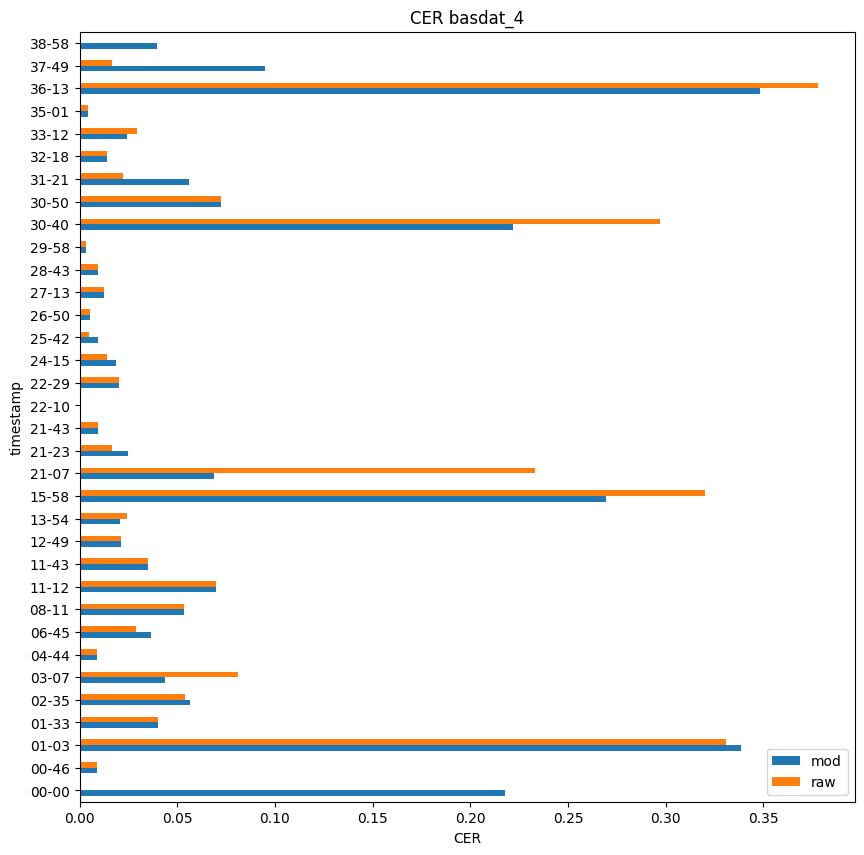

In [6]:
basdat_4[["CER_mod", "CER_raw"]].rename(columns={"CER_mod": "mod", "CER_raw": "raw"}).plot.barh(figsize=(10, 10))

plt.title("CER basdat_4")
  
# adding Label to the x-axis
plt.xlabel("CER")
  
# adding legend to the curve
plt.legend()

plt.show()

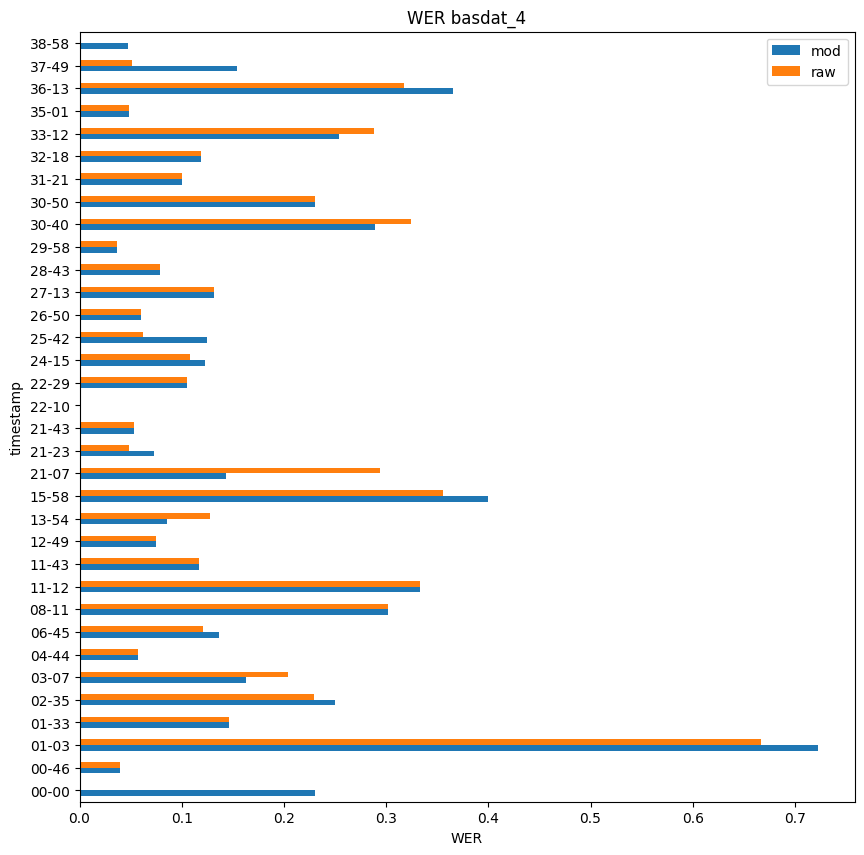

In [7]:
basdat_4[["WER_mod", "WER_raw"]].rename(columns={"WER_mod": "mod", "WER_raw": "raw"}).plot.barh(figsize=(10, 10))

plt.title("WER basdat_4")
  
# adding Label to the x-axis
plt.xlabel("WER")
  
# adding legend to the curve
plt.legend()

plt.show()

In [35]:
basdat_10 = df_dict["basdat_10"].merge(df_dict["raw_basdat_10"], on="timestamp", suffixes=["_mod", "_raw"])
basdat_10 = basdat_10[["CER_mod", "CER_raw", "WER_mod", "WER_raw"]]
display(basdat_10)
display(basdat_10.describe())

print("CER")
print("mod menang", (basdat_10["CER_mod"] - basdat_10["CER_raw"] < 0).sum())
print("raw menang", (basdat_10["CER_mod"] - basdat_10["CER_raw"] > 0).sum())
print("")
print("WER")
print("mod menang", (basdat_10["WER_mod"] - basdat_10["WER_raw"] < 0).sum())
print("raw menang", (basdat_10["WER_mod"] - basdat_10["WER_raw"] > 0).sum())

,CER_mod,CER_raw,WER_mod,WER_raw
timestamp,,,,
00-00,0.819277,0.000000,0.615385,0.000000
00-21,0.000000,0.000000,0.000000,0.000000
00-24,0.097561,0.097561,0.333333,0.333333
00-32,0.076923,0.076923,0.272727,0.272727
00-40,0.973684,0.990132,1.352941,1.382353
04-10,6.100000,6.100000,4.500000,5.000000
04-30,0.084211,0.084211,0.307692,0.307692
04-44,0.447236,0.248744,0.816327,0.714286
06-48,0.188462,0.196154,0.411765,0.352941


,CER_mod,CER_raw,WER_mod,WER_raw
count,17.000000,17.000000,17.000000,17.000000
mean,0.835839,0.715192,0.965658,0.893052
std,1.481629,1.479375,1.218864,1.299897
min,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.049261,0.263158,0.166667
50%,0.188462,0.097561,0.411765,0.333333
75%,0.973684,0.990132,1.236842,1.000000
max,6.100000,6.100000,4.500000,5.000000


CER
mod menang 2
raw menang 8

WER
mod menang 2
raw menang 9


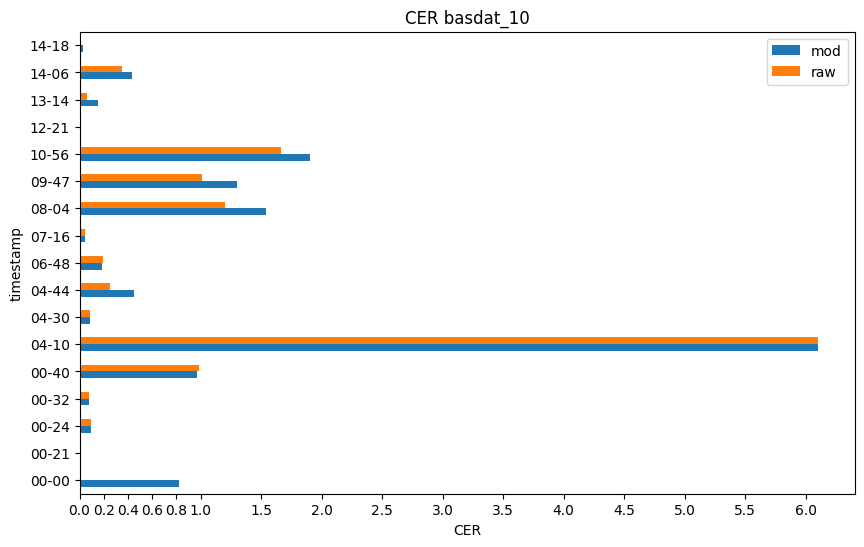

In [9]:
basdat_10[["CER_mod", "CER_raw"]].rename(columns={"CER_mod": "mod", "CER_raw": "raw"}).plot.barh(figsize=((10, 6)), xticks=np.concatenate((np.arange(0, 1, 0.2), np.arange(1, 6.5, 0.5)), axis=0))

plt.title("CER basdat_10")
  
# adding Label to the x-axis
plt.xlabel("CER")
  
# adding legend to the curve
plt.legend()

plt.show()

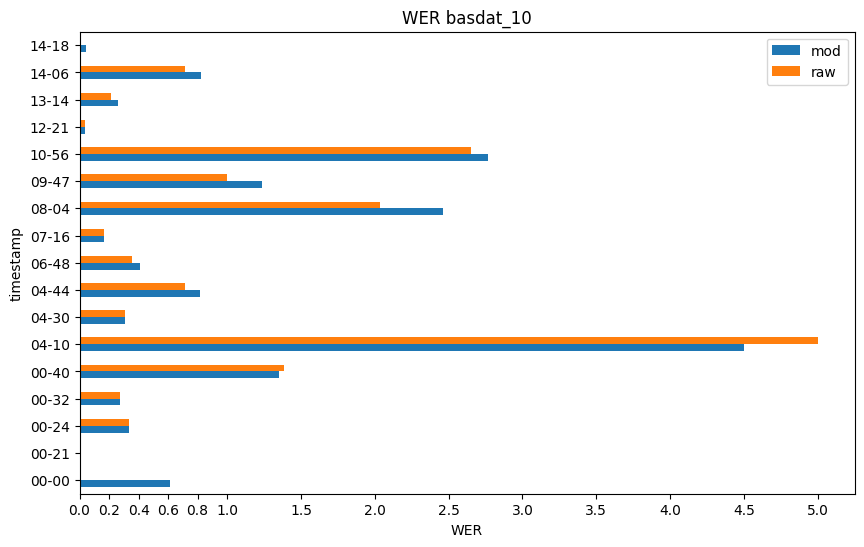

In [10]:
basdat_10[["WER_mod", "WER_raw"]].rename(columns={"WER_mod": "mod", "WER_raw": "raw"}).plot.barh(figsize=((10, 6)), xticks=np.concatenate((np.arange(0, 1, 0.2), np.arange(1, 5.5, 0.5)), axis=0))

plt.title("WER basdat_10")
  
# adding Label to the x-axis
plt.xlabel("WER")
  
# adding legend to the curve
plt.legend()

plt.show()

In [34]:
jarkom_6 = df_dict["jarkom_6"].merge(df_dict["raw_jarkom_6"], on="timestamp", suffixes=["_mod", "_raw"])
jarkom_6 = jarkom_6[["CER_mod", "CER_raw", "WER_mod", "WER_raw"]]
display(jarkom_6)
display(jarkom_6.describe())

print("CER")
print("mod menang", (jarkom_6["CER_mod"] - jarkom_6["CER_raw"] < 0).sum())
print("raw menang", (jarkom_6["CER_mod"] - jarkom_6["CER_raw"] > 0).sum())
print("")
print("WER")
print("mod menang", (jarkom_6["WER_mod"] - jarkom_6["WER_raw"] < 0).sum())
print("raw menang", (jarkom_6["WER_mod"] - jarkom_6["WER_raw"] > 0).sum())

,CER_mod,CER_raw,WER_mod,WER_raw
timestamp,,,,
00-08,0.094421,0.557940,0.242424,0.636364
00-38,0.765854,0.756098,0.758621,0.827586
00-47,0.154930,0.253521,0.181818,0.363636
01-08,0.104167,0.078125,0.166667,0.133333
01-27,0.059524,0.059524,0.093023,0.093023
02-00,0.559420,0.544928,0.535714,0.535714
02-02,0.803993,0.586207,1.000000,0.835443
03-00,0.150685,0.232877,0.285714,0.571429
03-17,0.136364,0.209091,0.333333,0.500000


,CER_mod,CER_raw,WER_mod,WER_raw
count,60.000000,60.000000,60.000000,60.000000
mean,0.348533,0.328295,0.430871,0.425630
std,0.402829,0.404074,0.431449,0.444657
min,0.043137,0.043137,0.086957,0.093023
25%,0.085761,0.068012,0.145178,0.142857
50%,0.159939,0.163351,0.261986,0.240866
75%,0.487321,0.528714,0.642281,0.571905
max,2.030928,1.979381,2.285714,2.357143


CER
mod menang 20
raw menang 28

WER
mod menang 20
raw menang 25


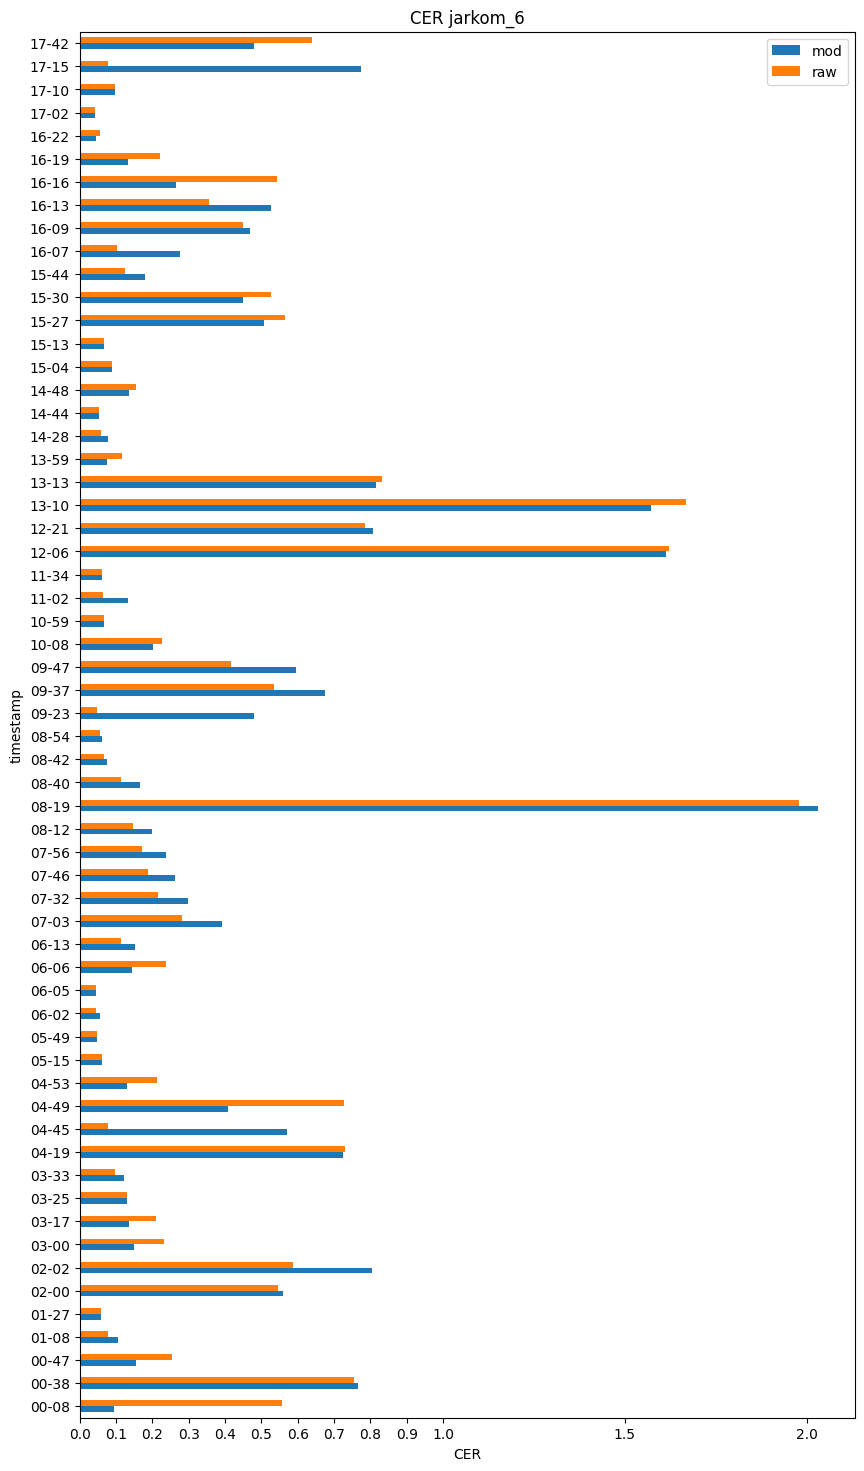

In [12]:
jarkom_6[["CER_mod", "CER_raw"]].rename(columns={"CER_mod": "mod", "CER_raw": "raw"}).plot.barh(figsize=(10, 18), xticks=np.concatenate((np.arange(0, 1, 0.1), np.arange(1, 2.5, 0.5)), axis=0))

plt.title("CER jarkom_6")
  
# adding Label to the x-axis
plt.xlabel("CER")
  
# adding legend to the curve
plt.legend()

plt.show()

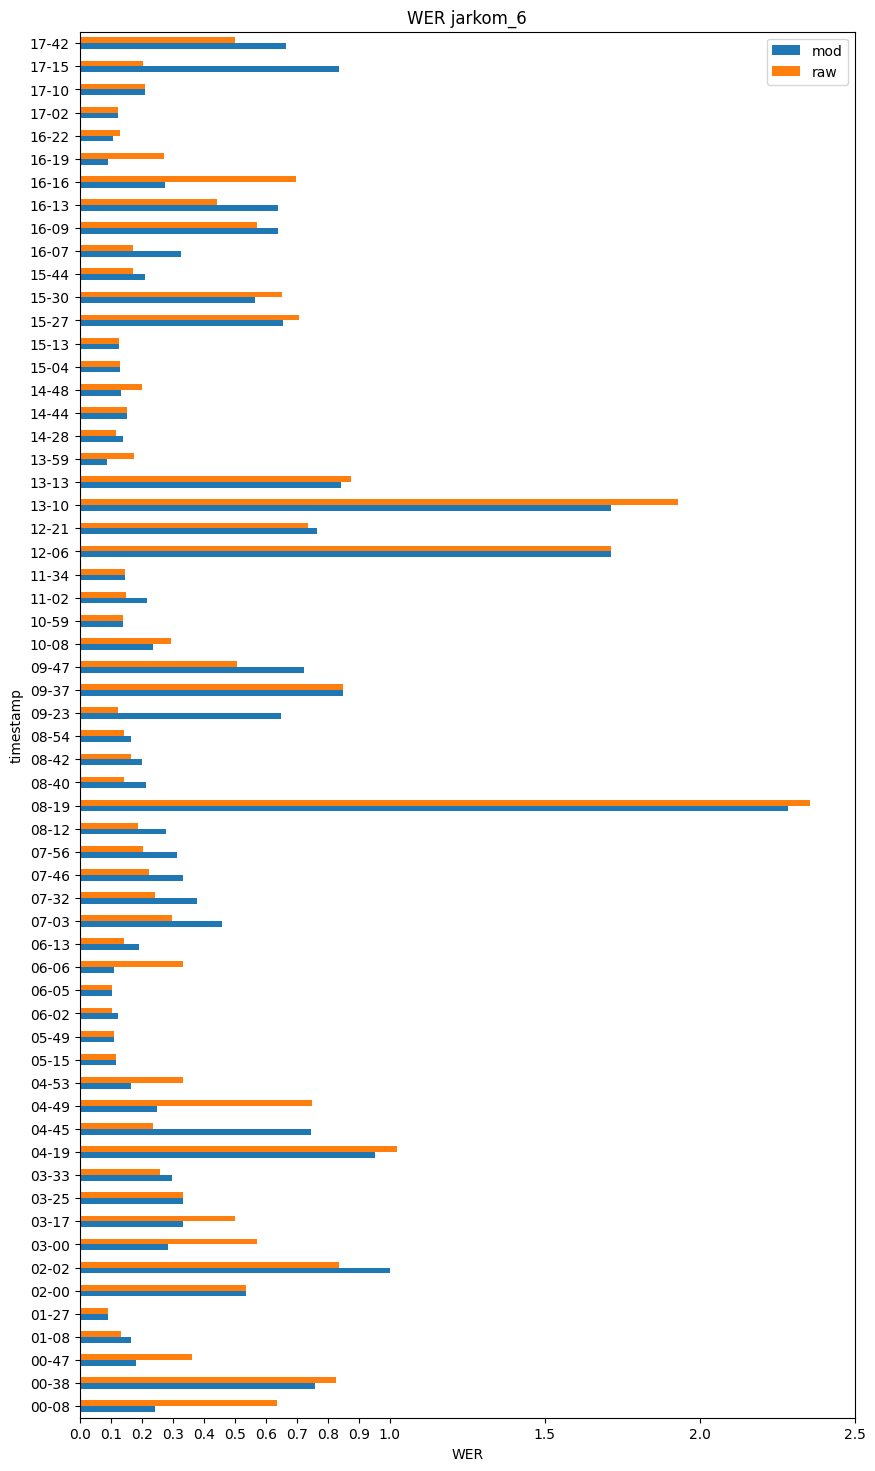

In [13]:
jarkom_6[["WER_mod", "WER_raw"]].rename(columns={"WER_mod": "mod", "WER_raw": "raw"}).plot.barh(figsize=(10, 18), xticks=np.concatenate((np.arange(0, 1, 0.1), np.arange(1, 2.6, 0.5)), axis=0))

plt.title("WER jarkom_6")
  
# adding Label to the x-axis
plt.xlabel("WER")
  
# adding legend to the curve
plt.legend()

plt.show()

In [37]:
jarkom_8 = df_dict["jarkom_8"].merge(df_dict["raw_jarkom_8"], on="timestamp", suffixes=["_mod", "_raw"])
jarkom_8 = jarkom_8[["CER_mod", "CER_raw", "WER_mod", "WER_raw"]]
display(jarkom_8)
display(jarkom_8.describe())

print("CER")
print("mod menang", (jarkom_8["CER_mod"] - jarkom_8["CER_raw"] < 0).sum())
print("raw menang", (jarkom_8["CER_mod"] - jarkom_8["CER_raw"] > 0).sum())
print("")
print("WER")
print("mod menang", (jarkom_8["WER_mod"] - jarkom_8["WER_raw"] < 0).sum())
print("raw menang", (jarkom_8["WER_mod"] - jarkom_8["WER_raw"] > 0).sum())

,CER_mod,CER_raw,WER_mod,WER_raw
timestamp,,,,
00-08,0.228137,0.391635,0.416667,0.444444
00-23,0.592040,0.582090,0.678571,0.678571
00-28,0.080247,0.129630,0.130435,0.217391
01-13,0.073171,0.107317,0.129032,0.193548
01-41,0.055882,0.055882,0.127660,0.127660
02-12,0.032828,0.068182,0.058824,0.176471
02-33,0.126263,0.118687,0.215686,0.215686
02-42,0.344444,0.411111,0.538462,0.692308
03-39,0.230263,0.269737,0.391304,0.478261


,CER_mod,CER_raw,WER_mod,WER_raw
count,51.000000,51.000000,51.000000,51.000000
mean,0.652566,0.652474,0.899785,0.991719
std,1.400277,1.565011,2.089605,2.294445
min,0.032828,0.050595,0.058824,0.098039
25%,0.080383,0.090872,0.141429,0.172505
50%,0.221477,0.182573,0.285714,0.285714
75%,0.599374,0.465556,0.710420,0.685440
max,8.772727,10.181818,13.666667,14.333333


CER
mod menang 30
raw menang 15

WER
mod menang 32
raw menang 8


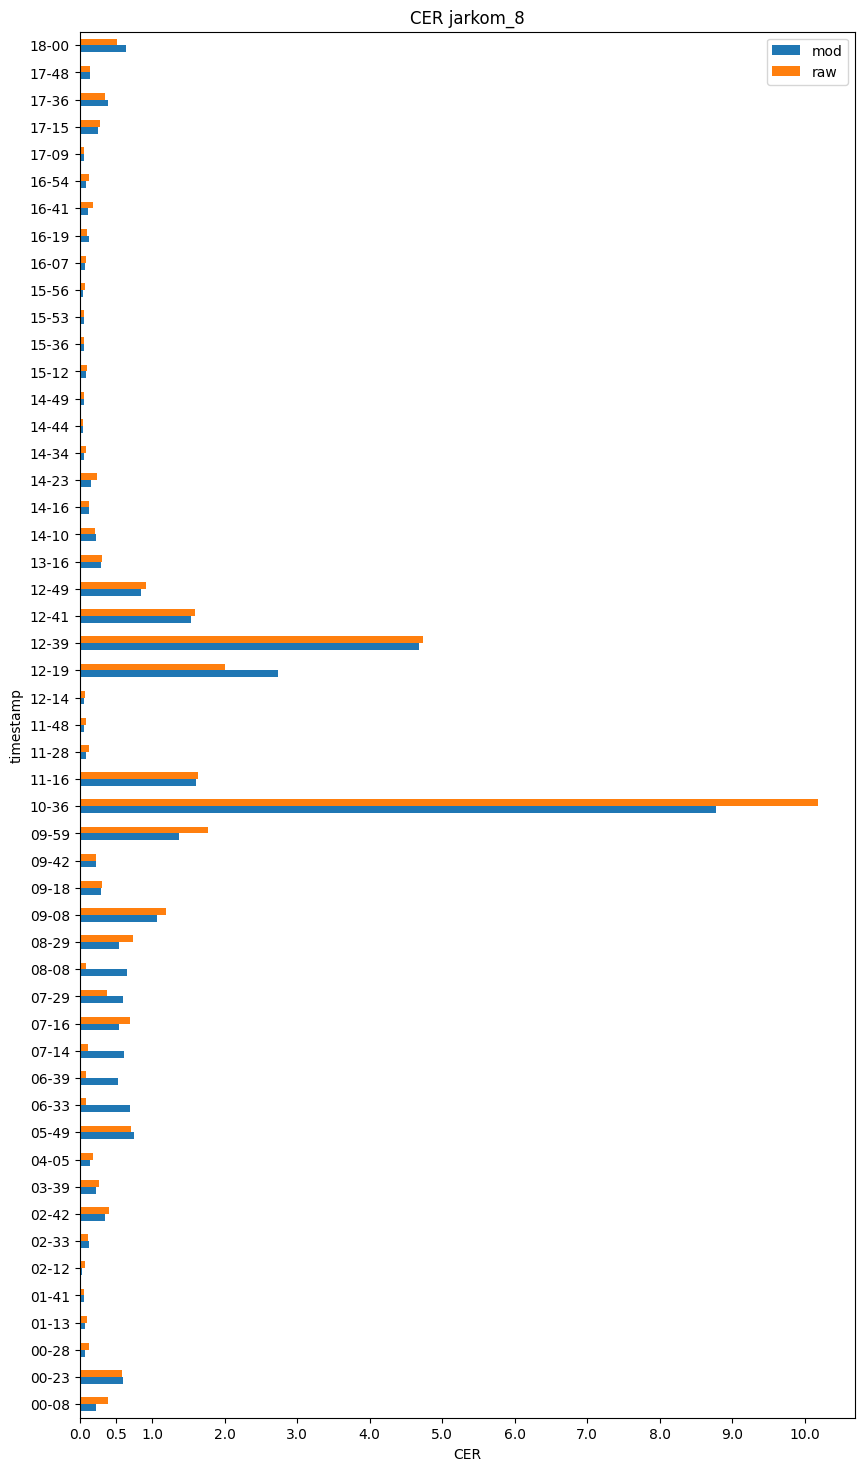

In [15]:
jarkom_8[["CER_mod", "CER_raw"]].rename(columns={"CER_mod": "mod", "CER_raw": "raw"}).plot.barh(figsize=(10, 18), xticks=np.concatenate((np.arange(0, 1, 0.5), np.arange(1, 10.5, 1)), axis=0))

plt.title("CER jarkom_8")
  
# adding Label to the x-axis
plt.xlabel("CER")
  
# adding legend to the curve
plt.legend()

plt.show()

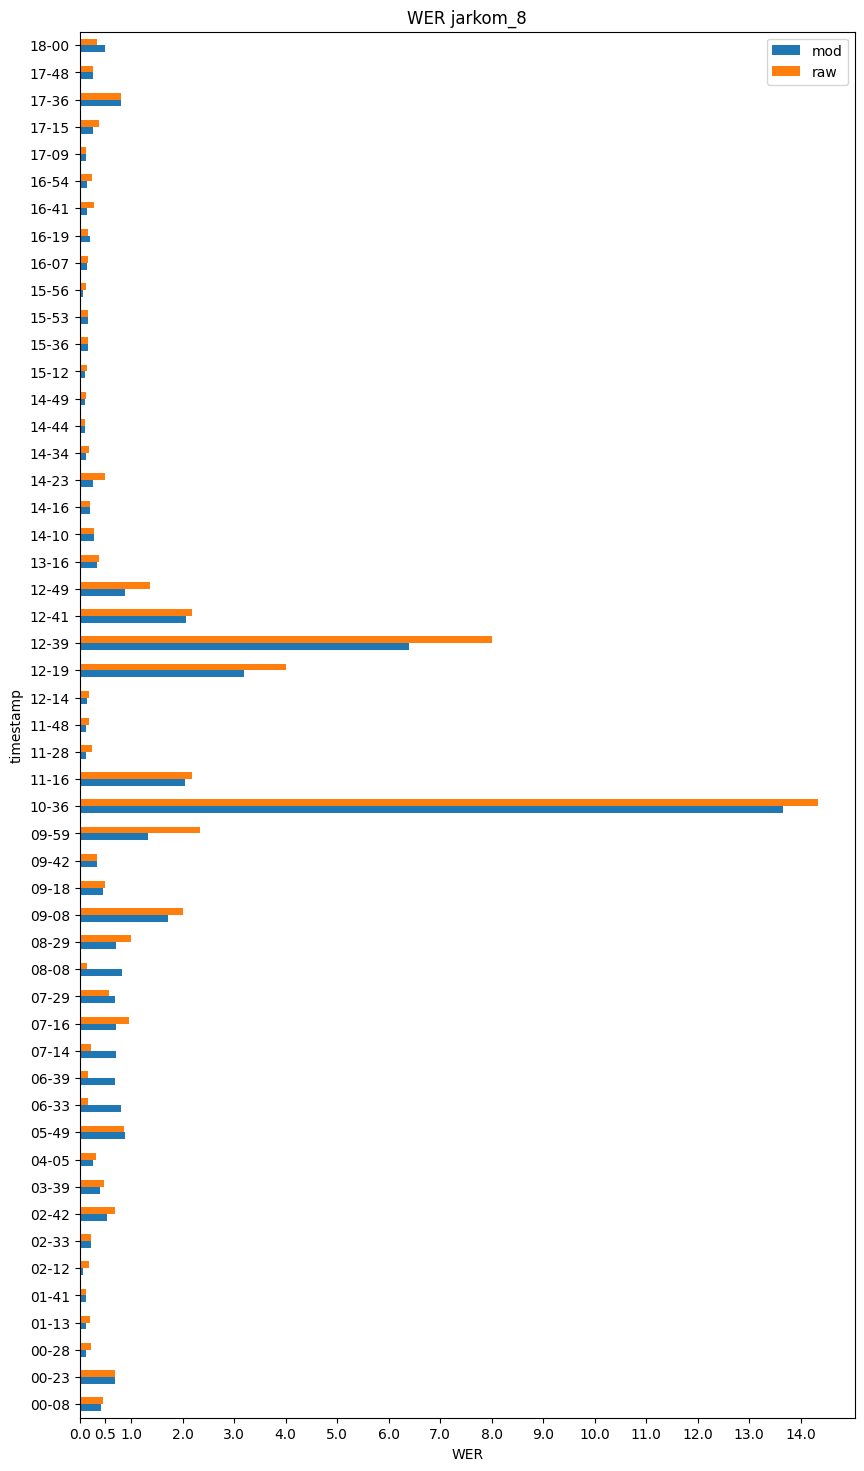

In [16]:
jarkom_8[["WER_mod", "WER_raw"]].rename(columns={"WER_mod": "mod", "WER_raw": "raw"}).plot.barh(figsize=(10, 18), xticks=np.concatenate((np.arange(0, 1, 0.5), np.arange(1, 14.5, 1)), axis=0))

plt.title("WER jarkom_8")
  
# adding Label to the x-axis
plt.xlabel("WER")
  
# adding legend to the curve
plt.legend()

plt.show()

In [38]:
jarkom_9 = df_dict["jarkom_9"].merge(df_dict["raw_jarkom_9"], on="timestamp", suffixes=["_mod", "_raw"])
jarkom_9 = jarkom_9[["CER_mod", "CER_raw", "WER_mod", "WER_raw"]]
display(jarkom_9)
display(jarkom_9.describe())

print("CER")
print("mod menang", (jarkom_9["CER_mod"] - jarkom_9["CER_raw"] < 0).sum())
print("raw menang", (jarkom_9["CER_mod"] - jarkom_9["CER_raw"] > 0).sum())
print("")
print("WER")
print("mod menang", (jarkom_9["WER_mod"] - jarkom_9["WER_raw"] < 0).sum())
print("raw menang", (jarkom_9["WER_mod"] - jarkom_9["WER_raw"] > 0).sum())

,CER_mod,CER_raw,WER_mod,WER_raw
timestamp,,,,
00-08,0.197674,0.089147,0.382353,0.235294
00-18,0.676617,0.666667,0.678571,0.678571
00-29,0.960396,0.970297,1.000000,0.923077
00-50,0.763006,0.543353,0.904762,0.571429
01-01,0.104839,0.153226,0.187500,0.312500
01-23,0.034826,0.034826,0.064516,0.064516
02-00,0.186667,0.213333,0.181818,0.272727
02-21,0.069892,0.069892,0.107143,0.107143
02-41,0.059289,0.059289,0.105263,0.105263


,CER_mod,CER_raw,WER_mod,WER_raw
count,51.000000,51.000000,51.000000,51.000000
mean,0.212341,0.196364,0.306039,0.278675
std,0.207210,0.217673,0.228714,0.237292
min,0.025189,0.024129,0.051282,0.028571
25%,0.053683,0.035632,0.106203,0.082236
50%,0.161184,0.089147,0.279070,0.200000
75%,0.271579,0.290626,0.452763,0.436364
max,0.960396,0.970297,1.000000,0.923077


CER
mod menang 12
raw menang 26

WER
mod menang 9
raw menang 23


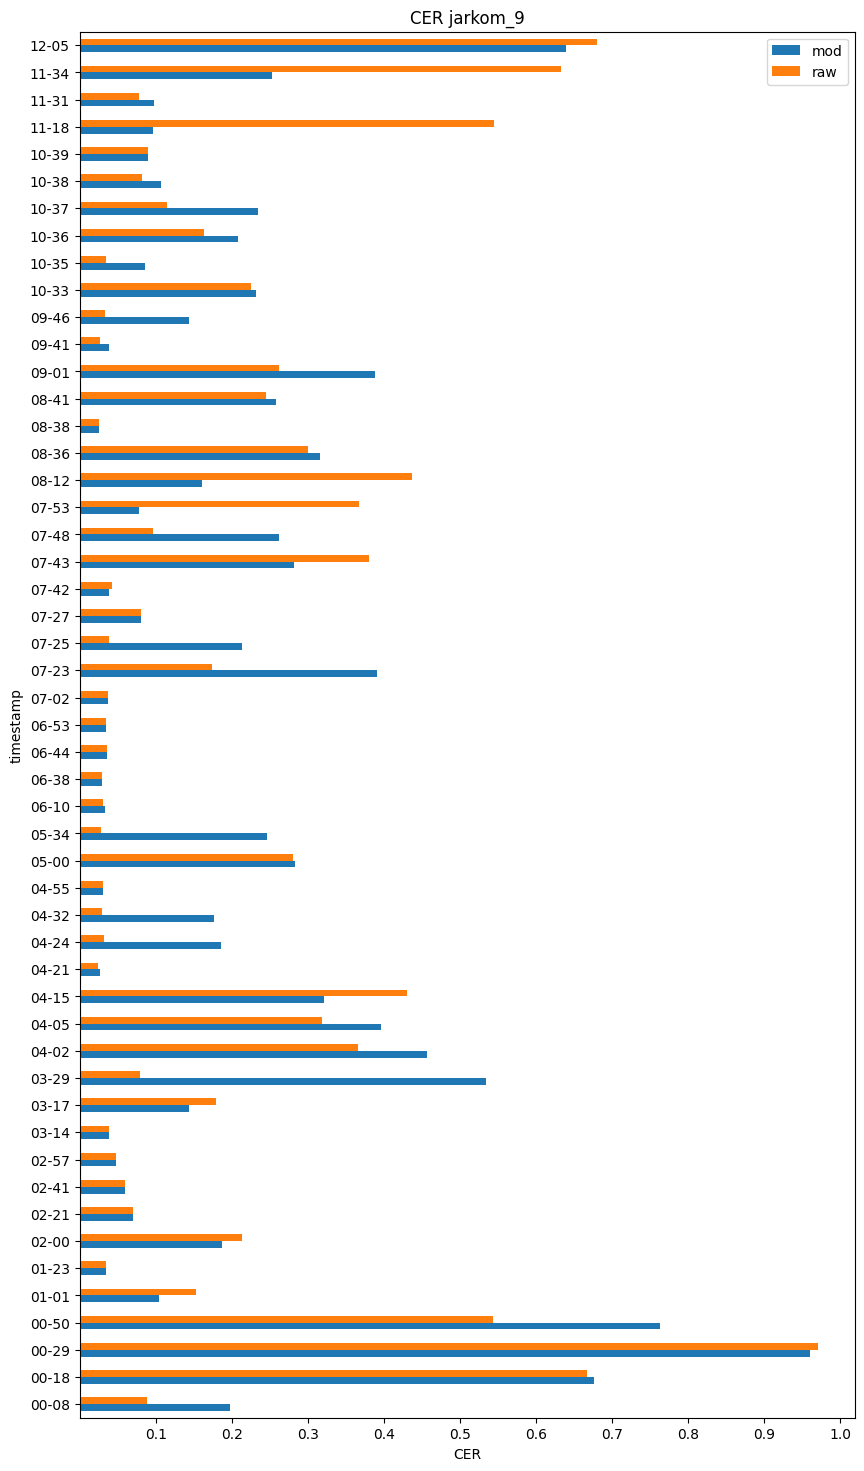

In [18]:
jarkom_9[["CER_mod", "CER_raw"]].rename(columns={"CER_mod": "mod", "CER_raw": "raw"}).plot.barh(figsize=(10, 18), xticks=np.arange(0.1, 1.1, 0.1))

plt.title("CER jarkom_9")
  
# adding Label to the x-axis
plt.xlabel("CER")

# adding legend to the curve
plt.legend()

plt.show()

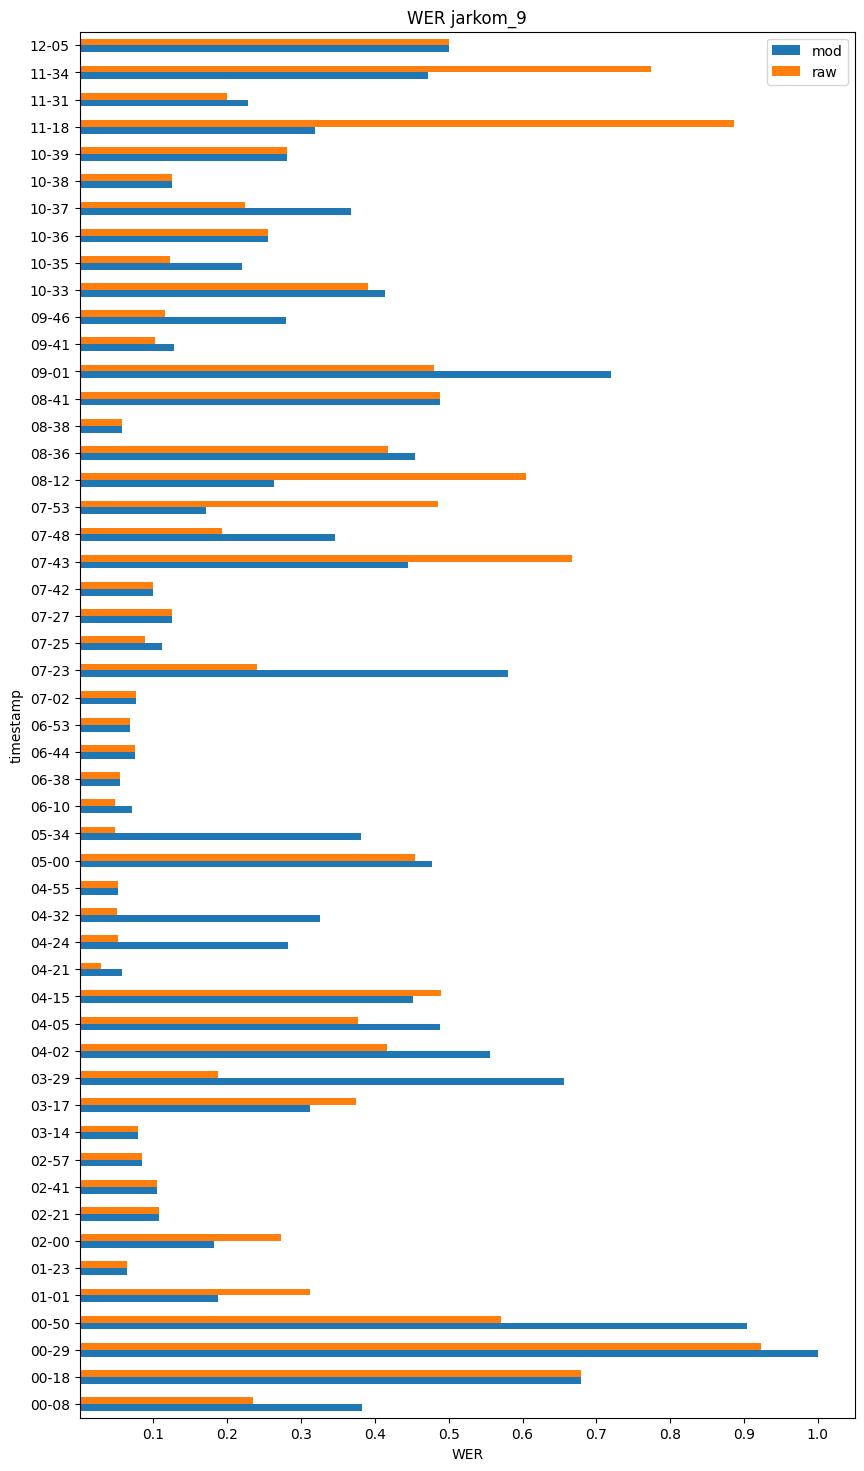

In [19]:
jarkom_9[["WER_mod", "WER_raw"]].rename(columns={"WER_mod": "mod", "WER_raw": "raw"}).plot.barh(figsize=(10, 18), xticks=np.arange(0.1, 1.1, 0.1))

plt.title("WER jarkom_9")
  
# adding Label to the x-axis
plt.xlabel("WER")
  
# adding legend to the curve
plt.legend()

plt.show()

In [20]:
# timestamp     CER_MOD     CER_RAW     WER_MOD     WER_RAW
# 12-39         4.682927	4.731707	6.400000	8.000000

new_gt_jarkom8_12_39 = "Streaming stored video: playout buffering Cumulative data constant bit rate video transmission variable network delay client video reception constant bit rate video playout at client client payout delay time"
hasil_jarkom8_12_39 = "Streaming stored video: playout buffering Cumulative data constant bit = — ne rate video client video i constant bit transmission reception rate video playout at client J” variable network delay [ + dlient playout time delay KOMPUTER"
raw_jarkom8_12_39 = "Streaming stored video: playout buffering constant bit = — g rate video client video i ent bit g transmission reception rate video v ig playout at client Fs variable t 3 network E J delay f fs) li [ + glient playout time delay KOMPUTER"

print(f"WER_mod: {wer(new_gt_jarkom8_12_39, hasil_jarkom8_12_39)}")
print(f"CER_mod: {cer(new_gt_jarkom8_12_39, hasil_jarkom8_12_39)}")

print(f"WER_raw: {wer(new_gt_jarkom8_12_39, raw_jarkom8_12_39)}")
print(f"CER_raw: {cer(new_gt_jarkom8_12_39, raw_jarkom8_12_39)}")

WER_mod: 0.6206896551724138
CER_mod: 0.5072463768115942
WER_raw: 1.0689655172413792
CER_raw: 0.6086956521739131


In [21]:
# timestamp     CER_MOD     CER_RAW     WER_MOD     WER_RAW
# 04-10         6.100000	6.100000	4.500000	5.000000

new_gt_basdat10_04_10 = "Query Tree name buyer- ssn=ssn pid=pid seller- ssn=ssn ssn pid name=fred name=gizmo Person Purchase Person Product"
hasil_basdat10_04_10 = "Query Tree pid=pid n pid orm Oname=gizmo Person Purchase berson Product"
raw_basdat10_04_10 = "Query Tree n pid=pid n pid a Oname=gizmo Person Purchase berson Product"

print(f"WER_mod: {wer(new_gt_basdat10_04_10, hasil_basdat10_04_10)}")
print(f"CER_mod: {cer(new_gt_basdat10_04_10, hasil_basdat10_04_10)}")

print(f"WER_raw: {wer(new_gt_basdat10_04_10, raw_basdat10_04_10)}")
print(f"CER_raw: {cer(new_gt_basdat10_04_10, raw_basdat10_04_10)}")

WER_mod: 0.5625
CER_mod: 0.42105263157894735
WER_raw: 0.5625
CER_raw: 0.40350877192982454
